In [1]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss 

import torch

import train_model
import test_model

### Model definition

In [2]:
# Data used: http://medicaldecathlon.com/ 

data_path = './data'
model_path = './results/5P_200E_128px'
max_epochs = 200

img_size = 128

device = torch.device('cpu') # CPU used: Intel® Core™ i5-6300U CPU @ 2.40GHz × 4 

model = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2, 
    norm=Norm.BATCH
).to(device)

loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

### Data preparation

In [3]:
train_loader, test_loader = train_model.prepare(data_path, img_size)

### Training the model

In [4]:
train_model.train(train_loader, test_loader, model, max_epochs, device, optimizer, loss_function, model_path)

----------
epoch 1/200
1/5, Train_loss: 0.5762
Train_dice: 0.4238
2/5, Train_loss: 0.5729
Train_dice: 0.4271
3/5, Train_loss: 0.5729
Train_dice: 0.4271
4/5, Train_loss: 0.5740
Train_dice: 0.4260
5/5, Train_loss: 0.5727
Train_dice: 0.4273
--------------------
Epoch_loss: 0.5738
Epoch_metric: 0.4262
test_loss_epoch: 0.5734
test_dice_epoch: 0.4151
current epoch: 1 current mean dice: 0.4158
best mean dice: 0.4151 at epoch: 1
----------
epoch 2/200
1/5, Train_loss: 0.5749
Train_dice: 0.4251
2/5, Train_loss: 0.5715
Train_dice: 0.4285
3/5, Train_loss: 0.5716
Train_dice: 0.4284
4/5, Train_loss: 0.5729
Train_dice: 0.4271
5/5, Train_loss: 0.5715
Train_dice: 0.4285
--------------------
Epoch_loss: 0.5725
Epoch_metric: 0.4275
test_loss_epoch: 0.5722
test_dice_epoch: 0.4239
current epoch: 2 current mean dice: 0.4245
best mean dice: 0.4239 at epoch: 2
----------
epoch 3/200
1/5, Train_loss: 0.5739
Train_dice: 0.4261
2/5, Train_loss: 0.5702
Train_dice: 0.4298
3/5, Train_loss: 0.5704
Train_dice: 0.429

### Testing the model

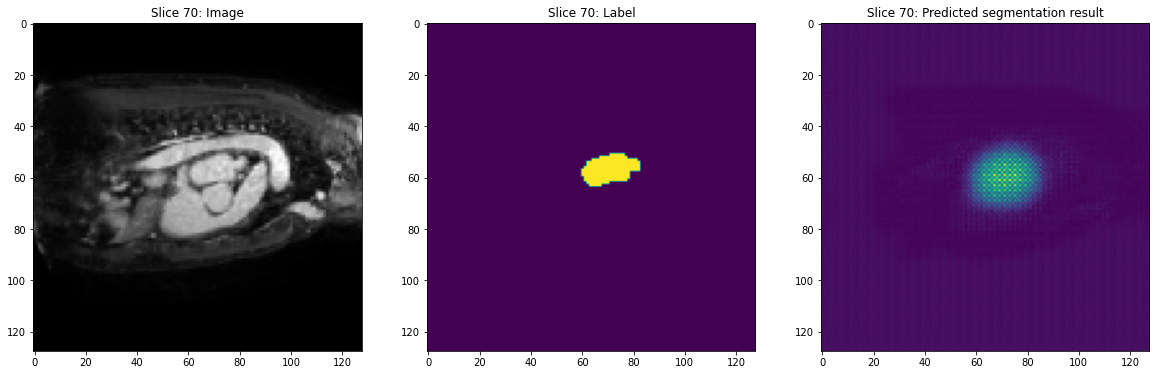

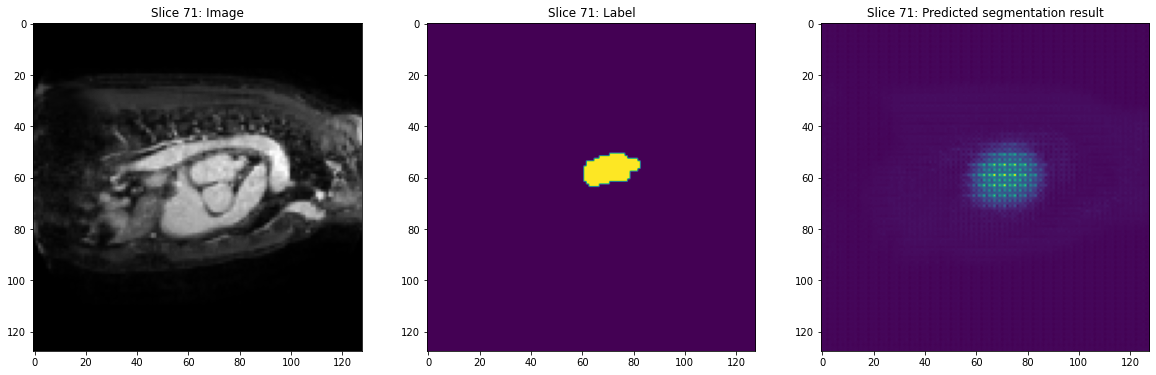

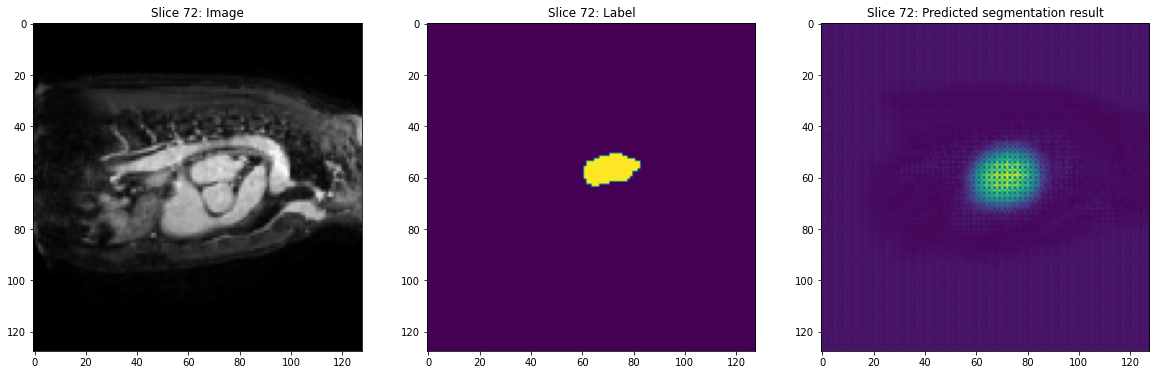

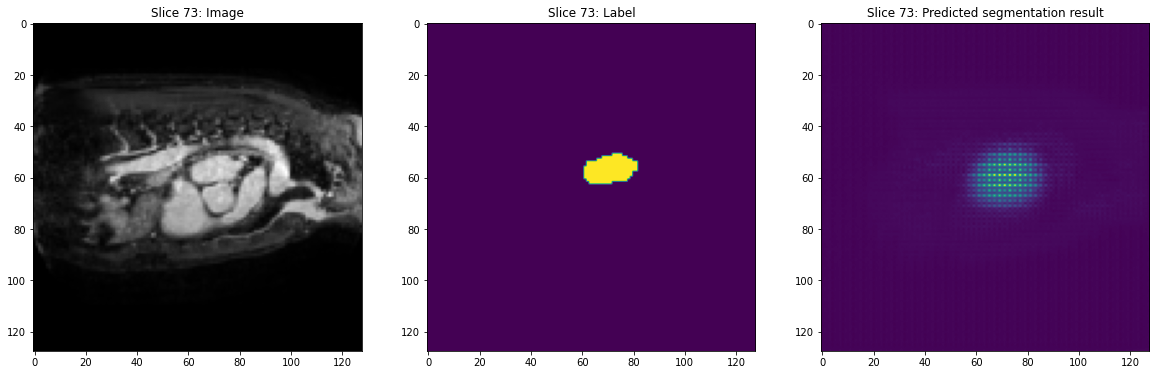

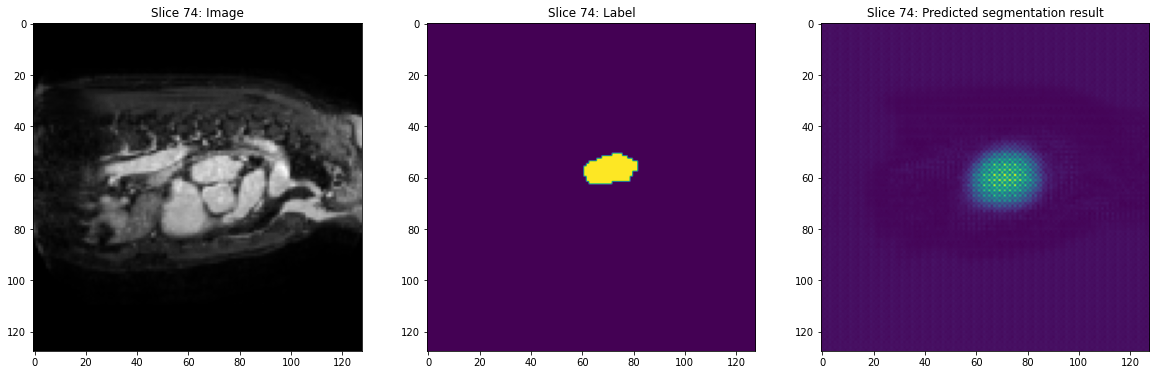

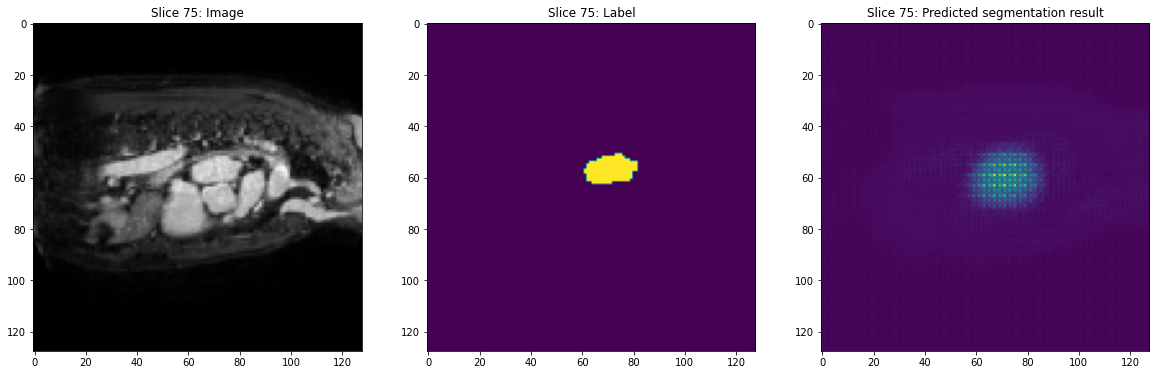

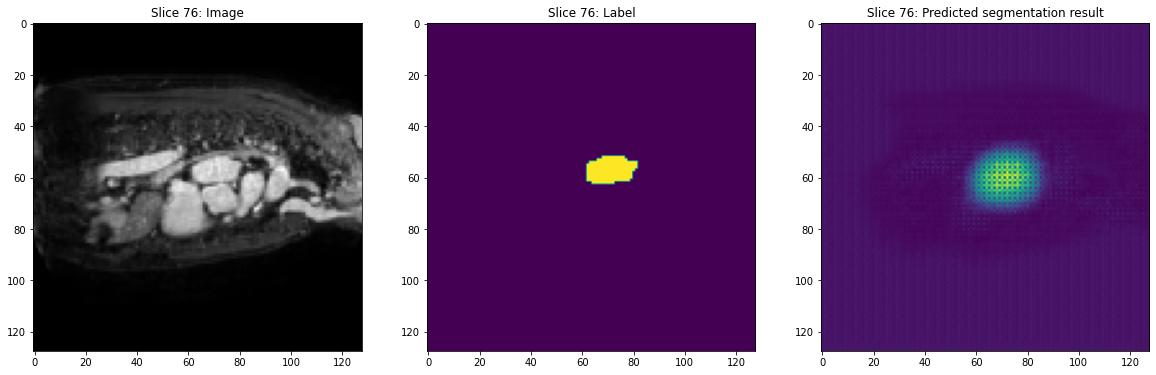

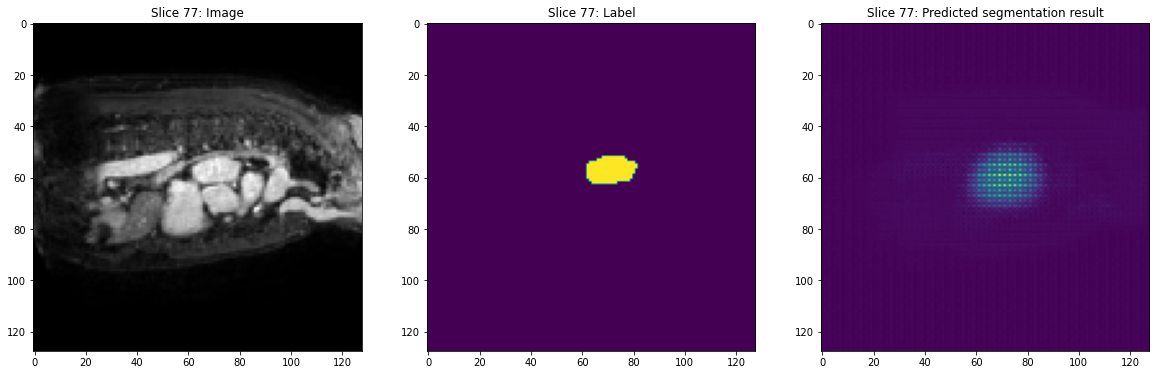

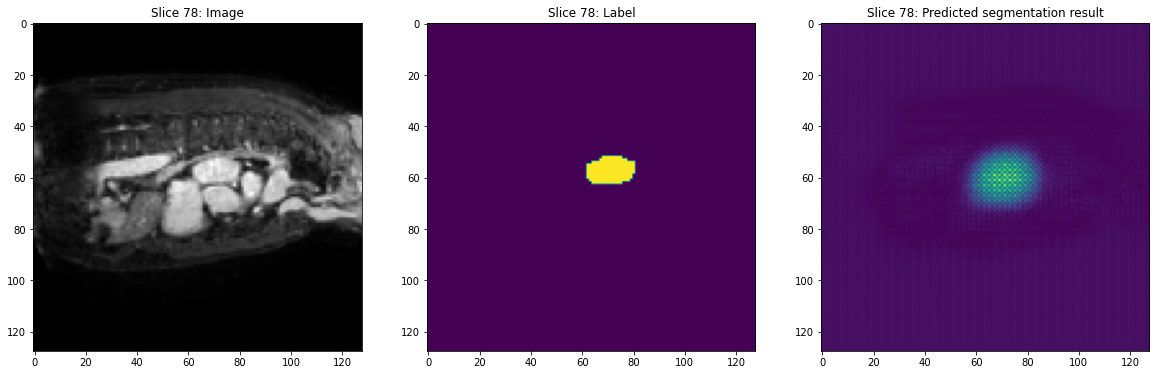

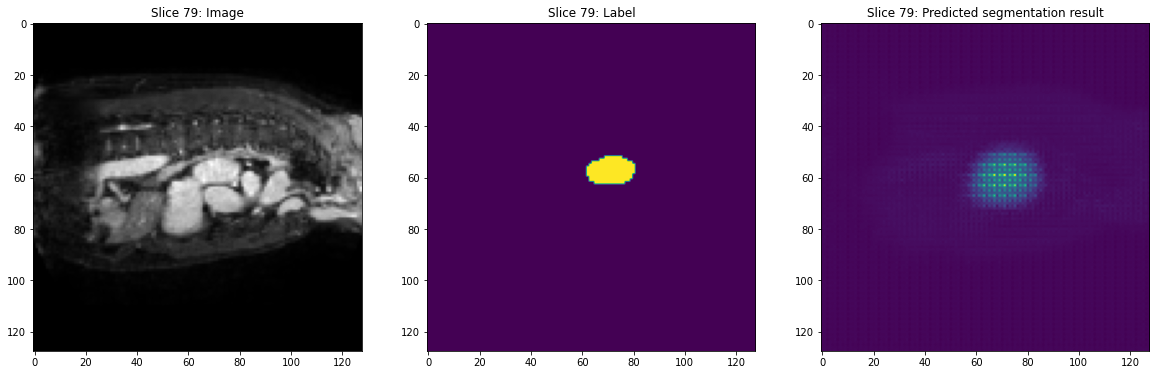

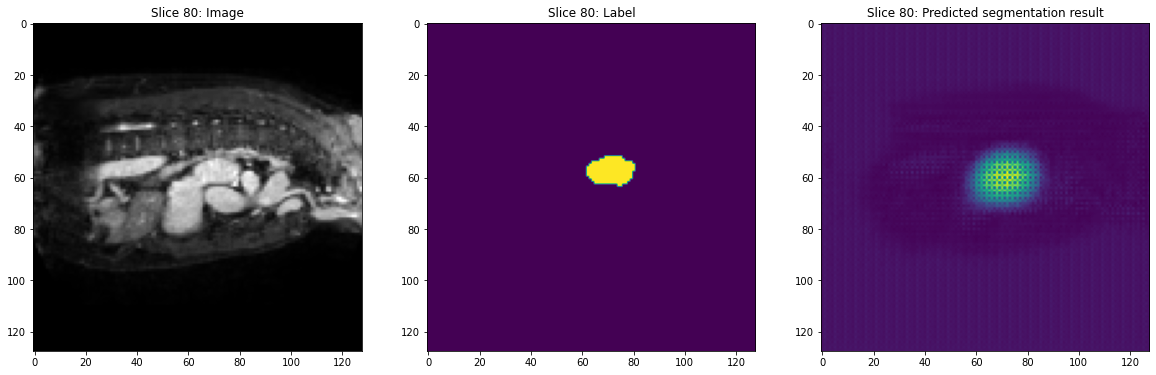

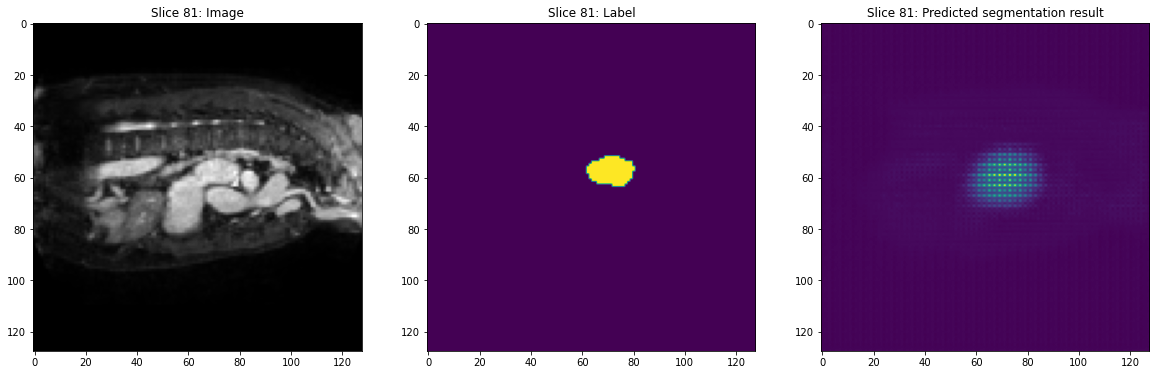

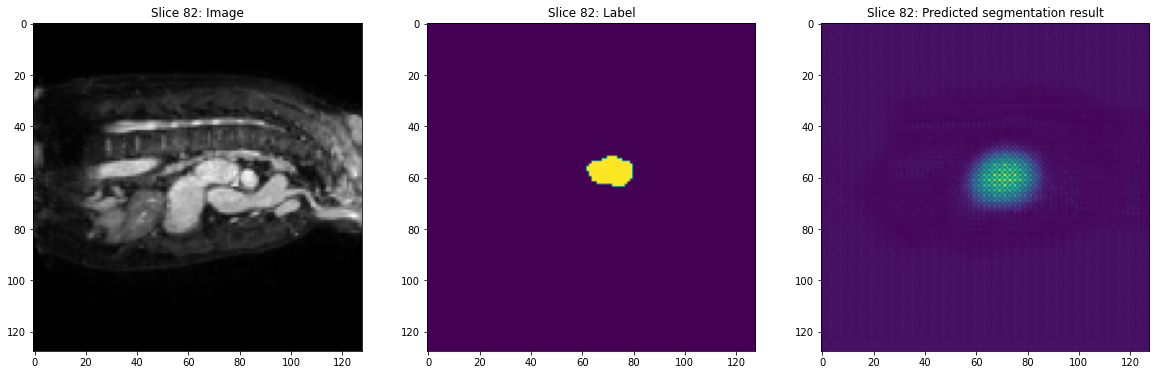

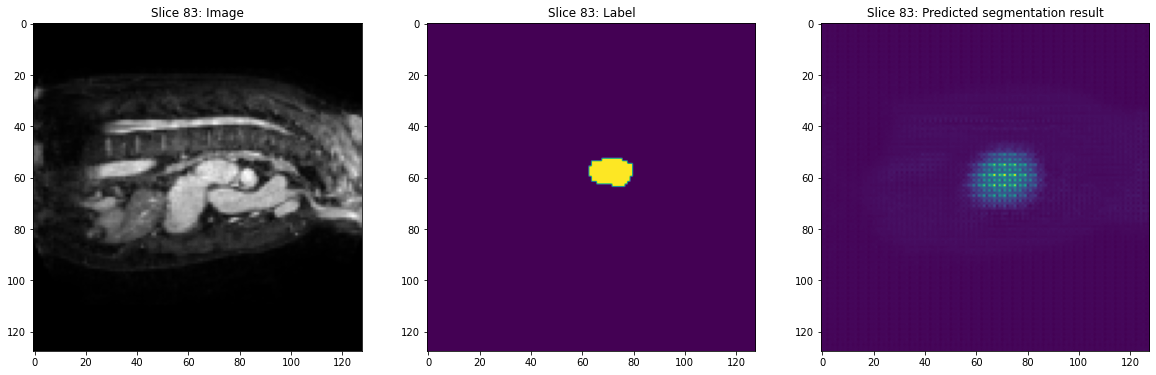

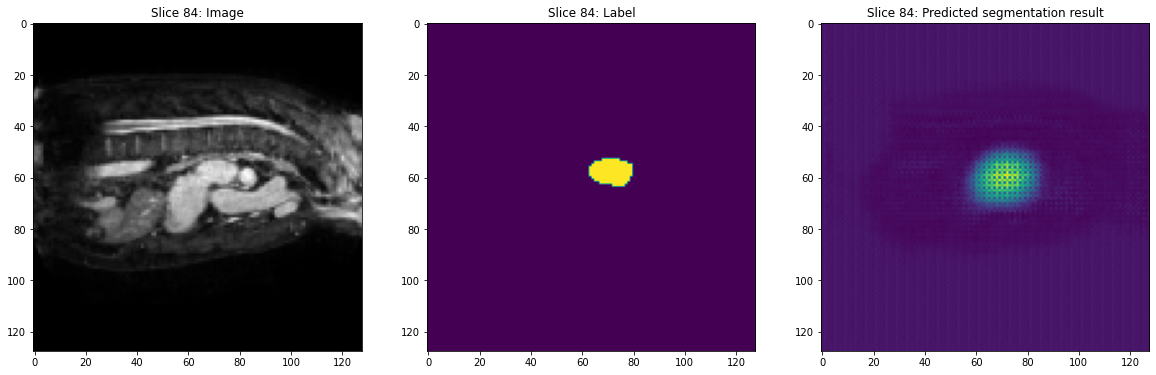

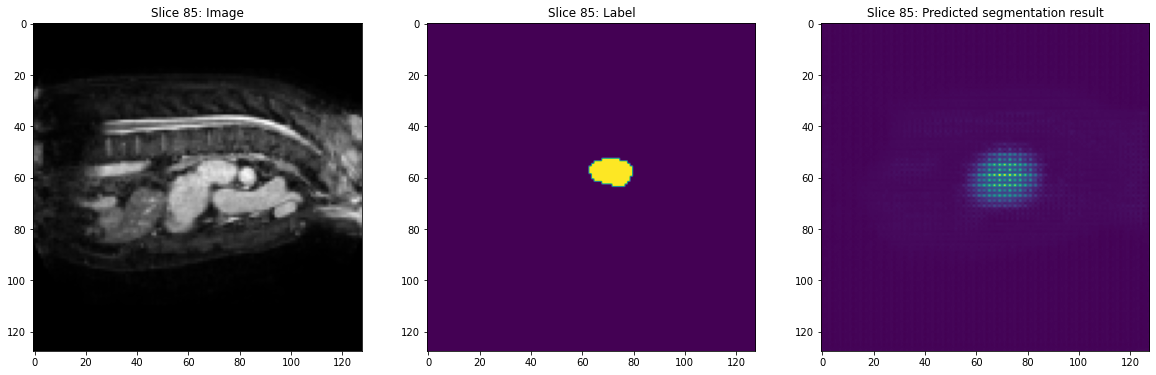

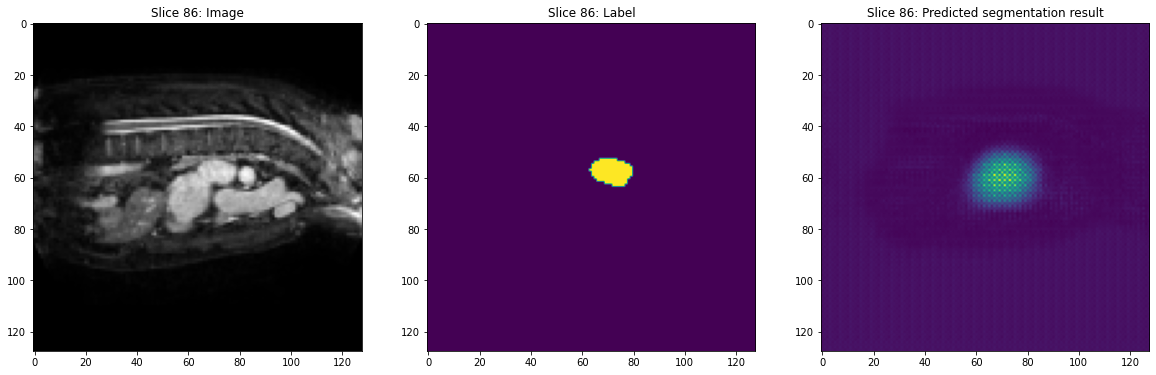

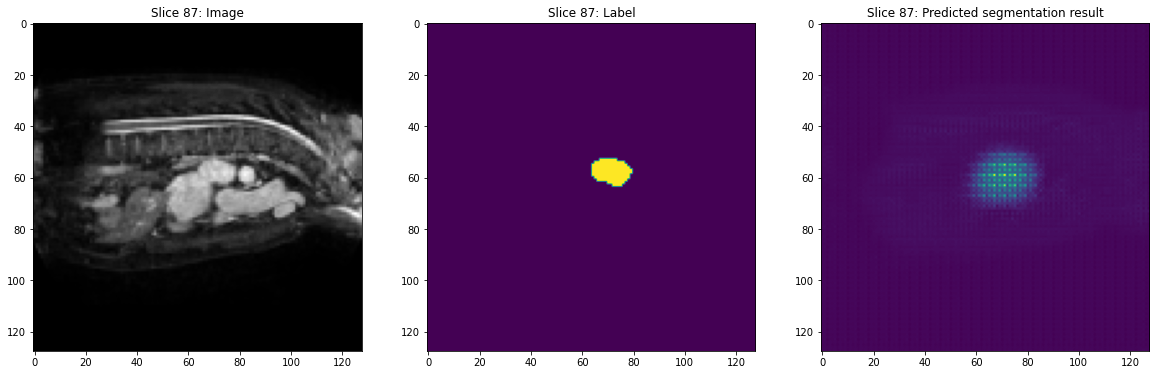

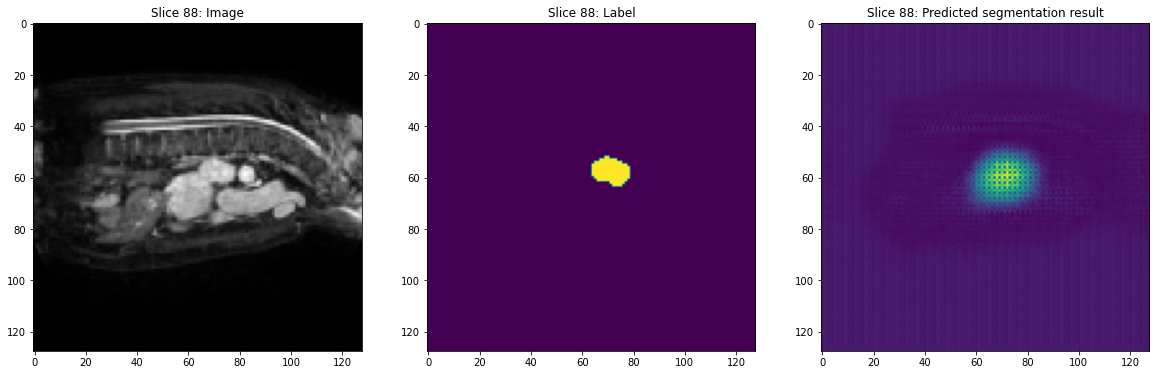

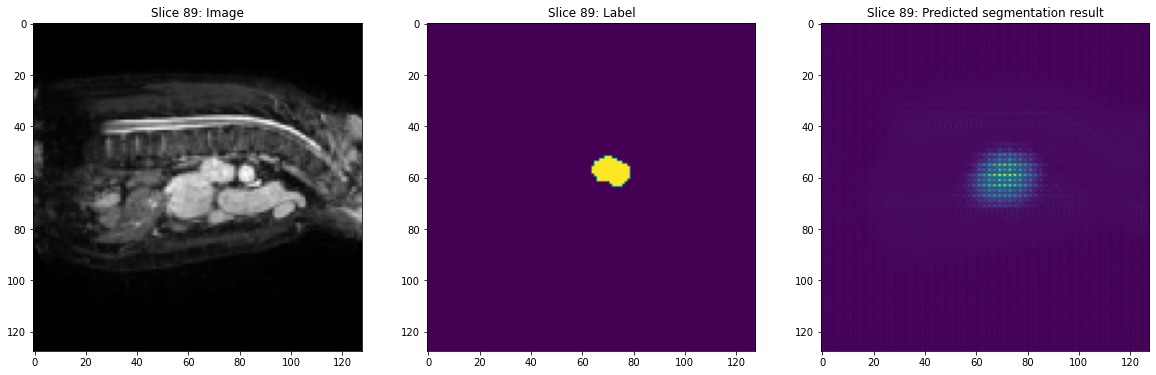

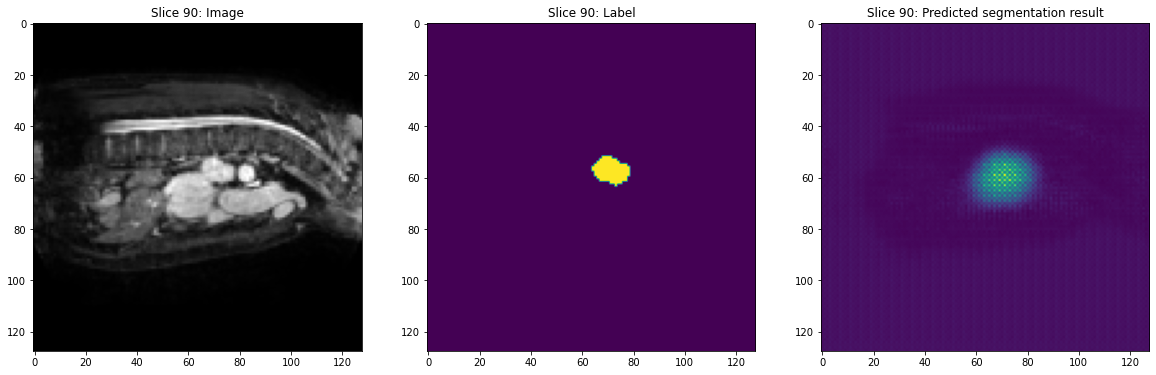

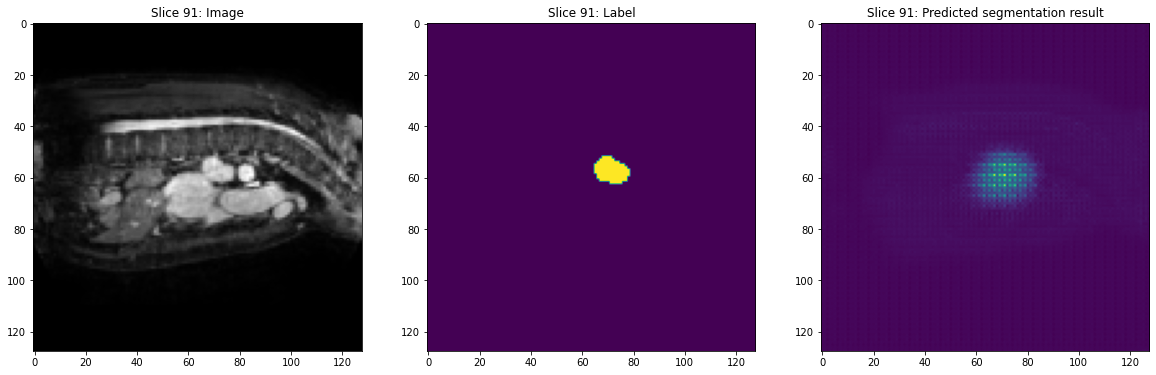

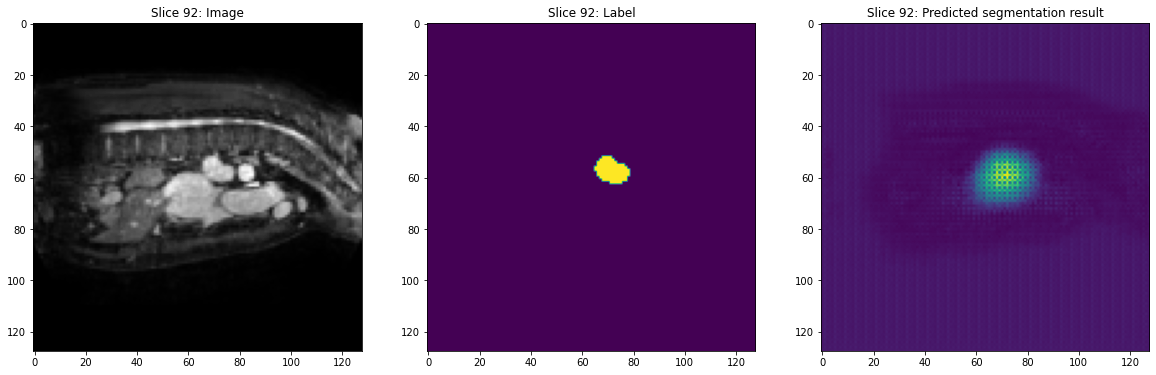

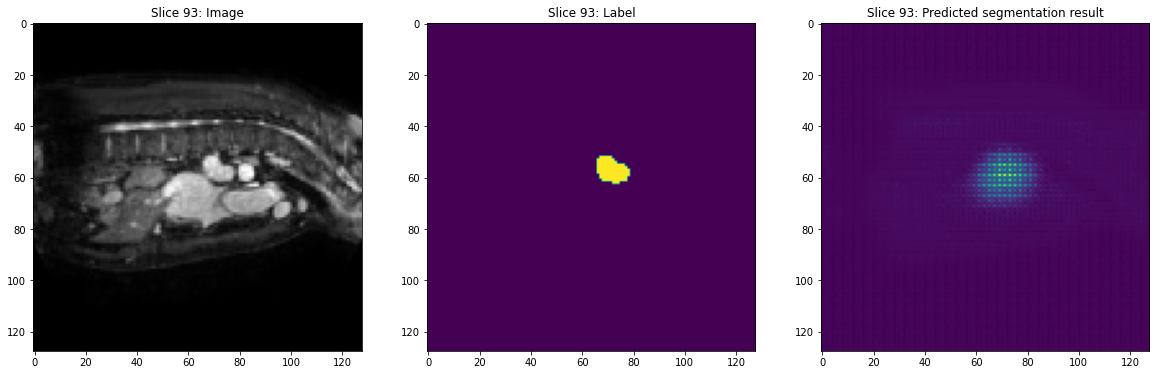

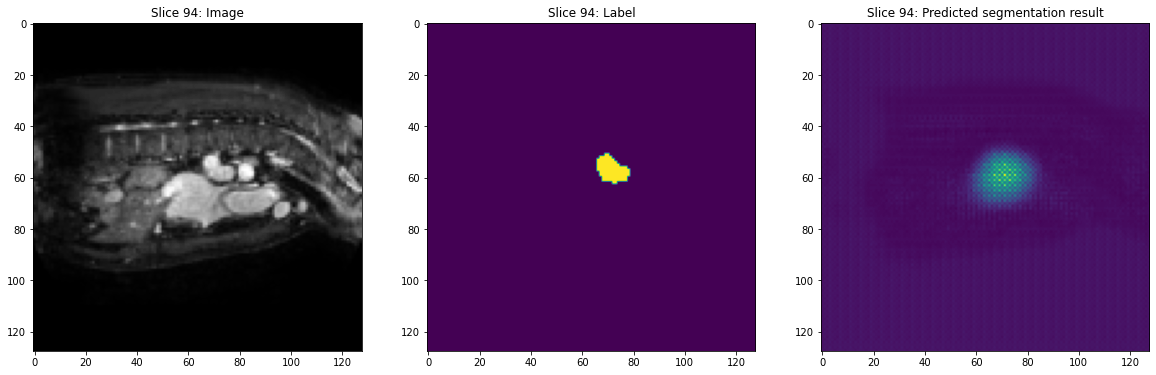

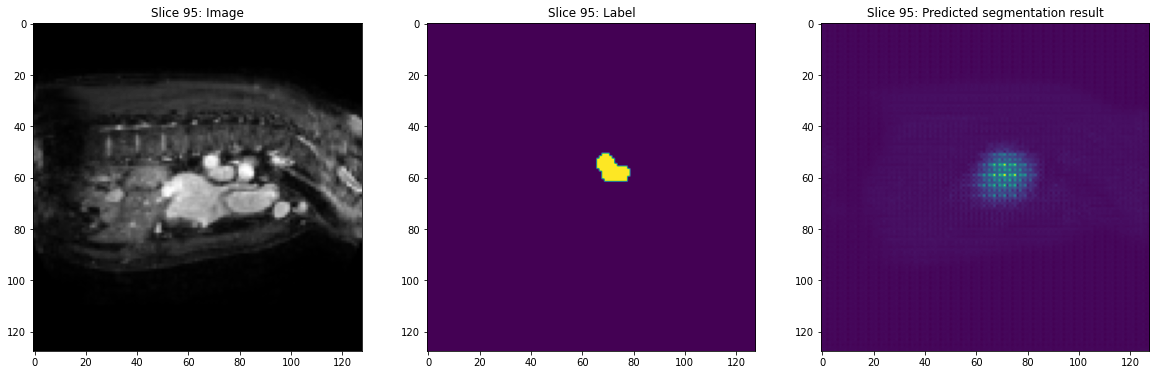

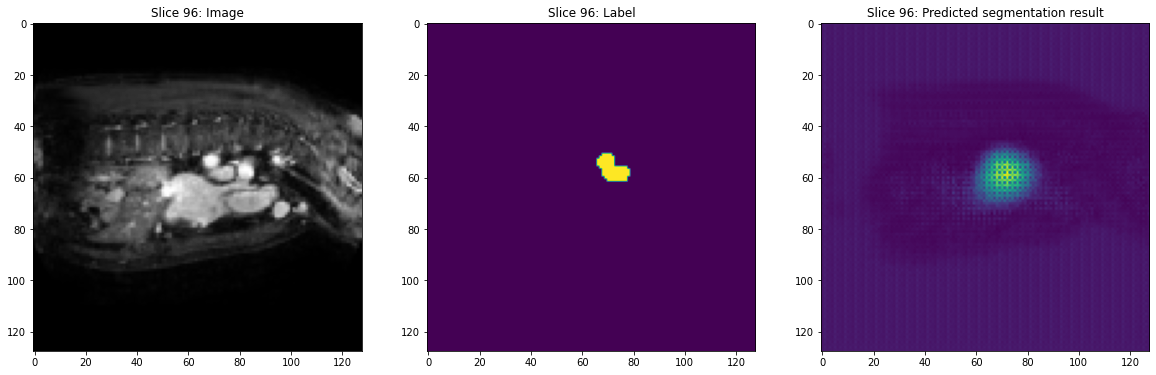

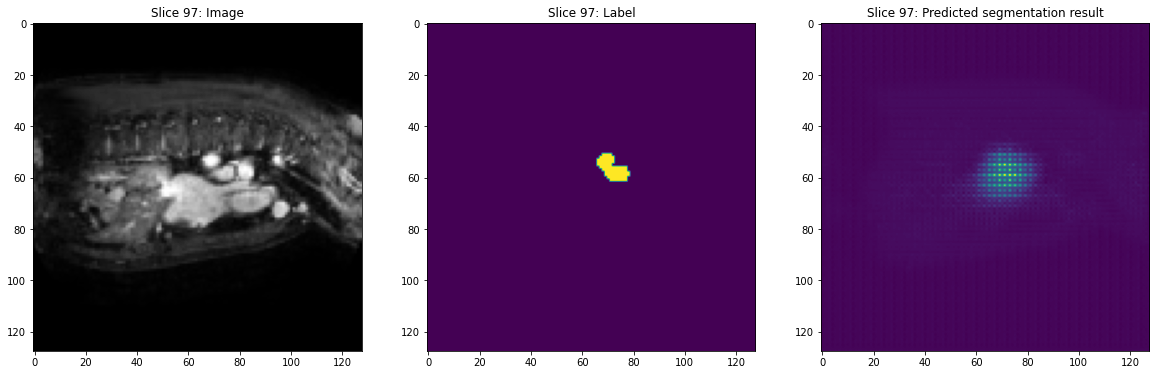

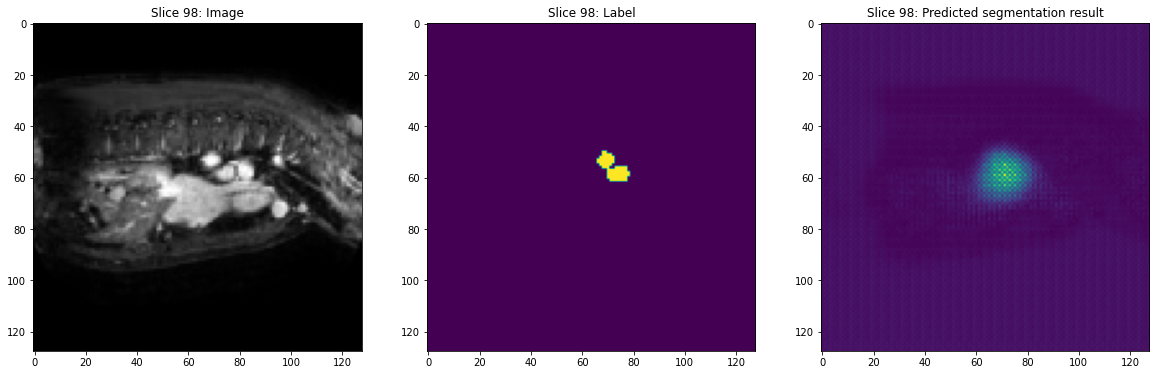

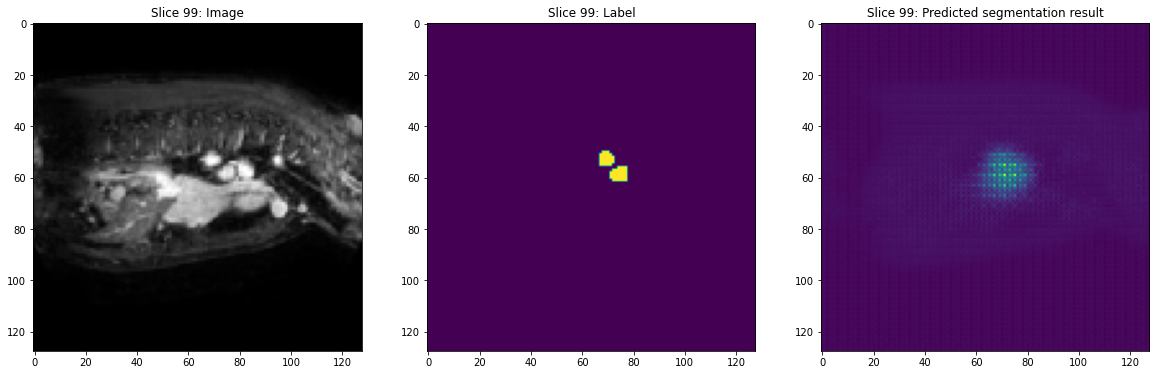

In [4]:
test_model.test(test_loader, model, model_path, img_size, device, s_min=70, s_max=100)

### Achieved segmentation metrics

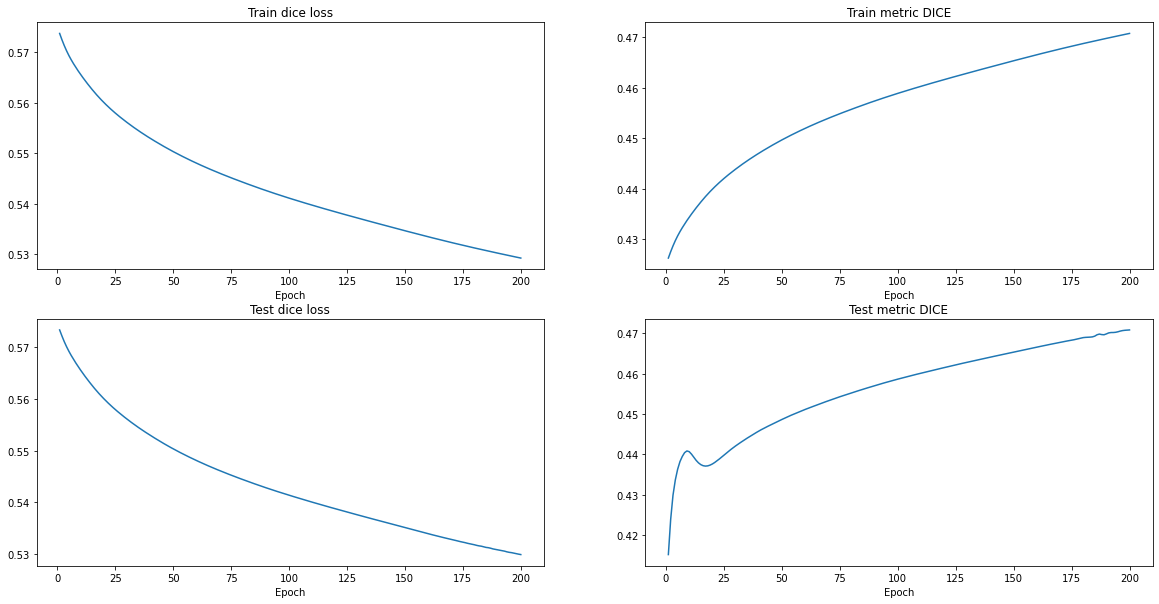

In [5]:
test_model.show_stats(model_path) 